```
--- Day 13: Shuttle Search ---

Your ferry can make it safely to a nearby port, but it won't get much further. When you call to book another ship, you discover that no ships embark from that port to your vacation island. You'll need to get from the port to the nearest airport.

Fortunately, a shuttle bus service is available to bring you from the sea port to the airport! Each bus has an ID number that also indicates how often the bus leaves for the airport.

Bus schedules are defined based on a timestamp that measures the number of minutes since some fixed reference point in the past. At timestamp 0, every bus simultaneously departed from the sea port. After that, each bus travels to the airport, then various other locations, and finally returns to the sea port to repeat its journey forever.

The time this loop takes a particular bus is also its ID number: the bus with ID 5 departs from the sea port at timestamps 0, 5, 10, 15, and so on. The bus with ID 11 departs at 0, 11, 22, 33, and so on. If you are there when the bus departs, you can ride that bus to the airport!

Your notes (your puzzle input) consist of two lines. The first line is your estimate of the earliest timestamp you could depart on a bus. The second line lists the bus IDs that are in service according to the shuttle company; entries that show x must be out of service, so you decide to ignore them.

To save time once you arrive, your goal is to figure out the earliest bus you can take to the airport. (There will be exactly one such bus.)

For example, suppose you have the following notes:

939
7,13,x,x,59,x,31,19
Here, the earliest timestamp you could depart is 939, and the bus IDs in service are 7, 13, 59, 31, and 19. Near timestamp 939, these bus IDs depart at the times marked D:

time   bus 7   bus 13  bus 59  bus 31  bus 19
929      .       .       .       .       .
930      .       .       .       D       .
931      D       .       .       .       D
932      .       .       .       .       .
933      .       .       .       .       .
934      .       .       .       .       .
935      .       .       .       .       .
936      .       D       .       .       .
937      .       .       .       .       .
938      D       .       .       .       .
939      .       .       .       .       .
940      .       .       .       .       .
941      .       .       .       .       .
942      .       .       .       .       .
943      .       .       .       .       .
944      .       .       D       .       .
945      D       .       .       .       .
946      .       .       .       .       .
947      .       .       .       .       .
948      .       .       .       .       .
949      .       D       .       .       .
The earliest bus you could take is bus ID 59. It doesn't depart until timestamp 944, so you would need to wait 944 - 939 = 5 minutes before it departs. Multiplying the bus ID by the number of minutes you'd need to wait gives 295.

What is the ID of the earliest bus you can take to the airport multiplied by the number of minutes you'll need to wait for that bus?
```

In [1]:
931/7

133.0

In [2]:
936/13

72.0

In [3]:
earliests(id,l,maxid) = [x for x ∈ (0:l+maxid) if (x < l + maxid) && (x > l) && (x % id) == 0]

earliests (generic function with 1 method)

In [4]:
function timetable(ids,latest)
    tt = []
    maxid = maximum(ids)
    for id ∈ ids
        push!(tt,earliests(id,latest,maxid))
    end
    tt
end

timetable (generic function with 1 method)

In [5]:
timetable([7,13,59,31,19],939)

5-element Array{Any,1}:
 [945, 952, 959, 966, 973, 980, 987, 994]
 [949, 962, 975, 988]
 [944]
 [961, 992]
 [950, 969, 988]

In [6]:
minimum(minimum.(timetable([7,13,59,31,19],939)))

944

In [7]:
function wait_time(ids,latest)
    busttime = minimum(minimum.(timetable(ids,latest)))    
    println("$busttime - $latest")
    busttime-latest
end
wait_time([7,13,59,31,19],939)

944 - 939


5

In [8]:
[x for x ∈ [7,13,59,31,19] if 944 % x == 0]

1-element Array{Int64,1}:
 59

In [9]:
59*5

295

```
1000509
17,x,x,x,x,x,x,x,x,x,x,37,x,x,x,x,x,739,x,29,x,x,x,x,x,x,x,x,x,x,13,x,x,x,x,x,x,x,x,x,23,x,x,x,x,x,x,x,971,x,x,x,x,x,x,x,x,x,41,x,x,x,x,x,x,x,x,19
```

In [10]:
minimum(minimum.(timetable([17,37,739,29,13,23,971,41,19],1000509)))

1000517

In [11]:
wait_time([17,37,739,29,13,23,971,41,19],1000509)

1000517 - 1000509


8

In [12]:
[x for x ∈ [17,37,739,29,13,23,971,41,19] if 1000517 % x == 0]

1-element Array{Int64,1}:
 37

In [13]:
37*8

296

```
--- Part Two ---

The shuttle company is running a contest: one gold coin for anyone that can find the earliest timestamp such that the first bus ID departs at that time and each subsequent listed bus ID departs at that subsequent minute. (The first line in your input is no longer relevant.)

For example, suppose you have the same list of bus IDs as above:

7,13,x,x,59,x,31,19
An x in the schedule means there are no constraints on what bus IDs must depart at that time.

This means you are looking for the earliest timestamp (called t) such that:

Bus ID 7 departs at timestamp t.
Bus ID 13 departs one minute after timestamp t.
There are no requirements or restrictions on departures at two or three minutes after timestamp t.
Bus ID 59 departs four minutes after timestamp t.
There are no requirements or restrictions on departures at five minutes after timestamp t.
Bus ID 31 departs six minutes after timestamp t.
Bus ID 19 departs seven minutes after timestamp t.
The only bus departures that matter are the listed bus IDs at their specific offsets from t. Those bus IDs can depart at other times, and other bus IDs can depart at those times. For example, in the list above, because bus ID 19 must depart seven minutes after the timestamp at which bus ID 7 departs, bus ID 7 will always also be departing with bus ID 19 at seven minutes after timestamp t.

In this example, the earliest timestamp at which this occurs is 1068781:

time     bus 7   bus 13  bus 59  bus 31  bus 19
1068773    .       .       .       .       .
1068774    D       .       .       .       .
1068775    .       .       .       .       .
1068776    .       .       .       .       .
1068777    .       .       .       .       .
1068778    .       .       .       .       .
1068779    .       .       .       .       .
1068780    .       .       .       .       .
1068781    D       .       .       .       .
1068782    .       D       .       .       .
1068783    .       .       .       .       .
1068784    .       .       .       .       .
1068785    .       .       D       .       .
1068786    .       .       .       .       .
1068787    .       .       .       D       .
1068788    D       .       .       .       D
1068789    .       .       .       .       .
1068790    .       .       .       .       .
1068791    .       .       .       .       .
1068792    .       .       .       .       .
1068793    .       .       .       .       .
1068794    .       .       .       .       .
1068795    D       D       .       .       .
1068796    .       .       .       .       .
1068797    .       .       .       .       .
In the above example, bus ID 7 departs at timestamp 1068788 (seven minutes after t). This is fine; the only requirement on that minute is that bus ID 19 departs then, and it does.

Here are some other examples:

The earliest timestamp that matches the list 17,x,13,19 is 3417.
67,7,59,61 first occurs at timestamp 754018.
67,x,7,59,61 first occurs at timestamp 779210.
67,7,x,59,61 first occurs at timestamp 1261476.
1789,37,47,1889 first occurs at timestamp 1202161486.
However, with so many bus IDs in your list, surely the actual earliest timestamp will be larger than 100000000000000!

What is the earliest timestamp such that all of the listed bus IDs depart at offsets matching their positions in the list?
```

In [14]:
7 * 13  * 59  * 31  * 19

3162341

In [15]:
prod([7,13,59,31,19])

3162341

In [16]:
lcm(7,13,59,31,19) 

3162341

In [17]:
gcd(7,13,59,31,19)

1

In [18]:
1068781 < 3162341

true

In [19]:
1068781 < 451763

false

In [121]:
answer = 1068781

1068781

In [21]:
x = -1

-1

In [22]:
7,13,x,x,59,x,31,19

(7, 13, -1, -1, 59, -1, 31, 19)

In [23]:
x = -1
opts = enumerate([7,13,x,x,59,x,31,19])
for (a,b) ∈ opts
    if b !=-1
        println("$(a-1) , $b)")
    end
end

0 , 7)
1 , 13)
4 , 59)
6 , 31)
7 , 19)


```
07,13,xx,xx,59,xx,31,19
00,01,..,..,04,..,06,07
```

In [14]:
options = [i for i ∈ 1:3162341]
for j ∈ options 
   if   j % 7 == 0 &&
        ((j+1) % 13)  == 0 &&  
        ((j+4) % 59)  == 0 &&
        ((j+6) % 31)  == 0 &&
        ((j+7) % 19)  == 0 
       println(j) 
    end
end

1068781


In [42]:
increment = 1
j = 1
#find bus 1
while true
   if j % 7 == 0 
       break     
   end
   j = j + increment
end
increment = increment * 7
println("$j, $increment")

#find bus 2
while true
   if (j+1) % 13 == 0 
       break     
   end
   j = j + increment
end
increment = increment * 13
println("$j, $increment")

#find bus 3
while true
   if (j+4) % 59 == 0 
       break     
   end
   j = j + increment
end
increment = increment * 59
println("$j, $increment")

#find bus 4
while true
   if (j+6) % 31 == 0 
       break     
   end
   j = j + increment
end
increment = increment * 31
println("$j, $increment")

#find bus 5
while true
   if (j+7) % 19 == 0 
       break     
   end
   j = j + increment
end
increment = increment * 19
println("$j, $increment")


7, 7
77, 91
350, 5369
70147, 166439
1068781, 3162341


In [47]:
function next_bus(increment,t,offset,bus_id)
    while true
       if (t+offset) % bus_id == 0 
           break     
       end
       t = t + increment
    end
    increment = increment * bus_id
    (increment,t)
end

next_bus (generic function with 2 methods)

In [52]:
(increment,t) = next_bus(1,1,0,7)
(increment,t) = next_bus(increment,t,1,13)
(increment,t) = next_bus(increment,t,4,59)
(increment,t) = next_bus(increment,t,6,31)
(increment,t) = next_bus(increment,t,7,19)

(3162341, 1068781)

In [58]:
function solve(increment, t, A)
    for (offset,bus_id) ∈ A
      (increment,t) = next_bus(increment,t,offset,bus_id)        
    end
    (increment,t)
end

solve (generic function with 1 method)

In [60]:
solve(1,1,[(0,7),(1,13),(4,59),(6,31),(7,19)])

(3162341, 1068781)

In [27]:
7 * 13

91

In [63]:
x=-1
A = []
opts = enumerate([17,x,x,x,x,x,x,x,x,x,x,37,x,x,x,x,x,739,x,29,x,x,x,x,x,x,x,x,x,x,13,x,x,x,x,x,x,x,x,x,23,x,x,x,x,x,x,x,971,x,x,x,x,x,x,x,x,x,41,x,x,x,x,x,x,x,x,19])
for (a,b) ∈ opts
    if b !=-1
        push!(A,(a-1,b))
    end
end
A

9-element Array{Any,1}:
 (0, 17)
 (11, 37)
 (17, 739)
 (19, 29)
 (30, 13)
 (40, 23)
 (48, 971)
 (58, 41)
 (67, 19)

In [65]:
@time solve(1,1,A)

  0.000020 seconds (46 allocations: 1.156 KiB)


(3048743993142809, 535296695251210)

```
(x+0) mod 17 == 0, (x+11) mod 37 == 0, (x+17) mod 739 == 0, (x+19) mod 29 == 0, (x+30) mod 13 == 0, (x+40) mod 23 == 0, (x+48) mod 971 == 0, (x+58) mod 41 == 0, (x+67) mod 19 == 0


```

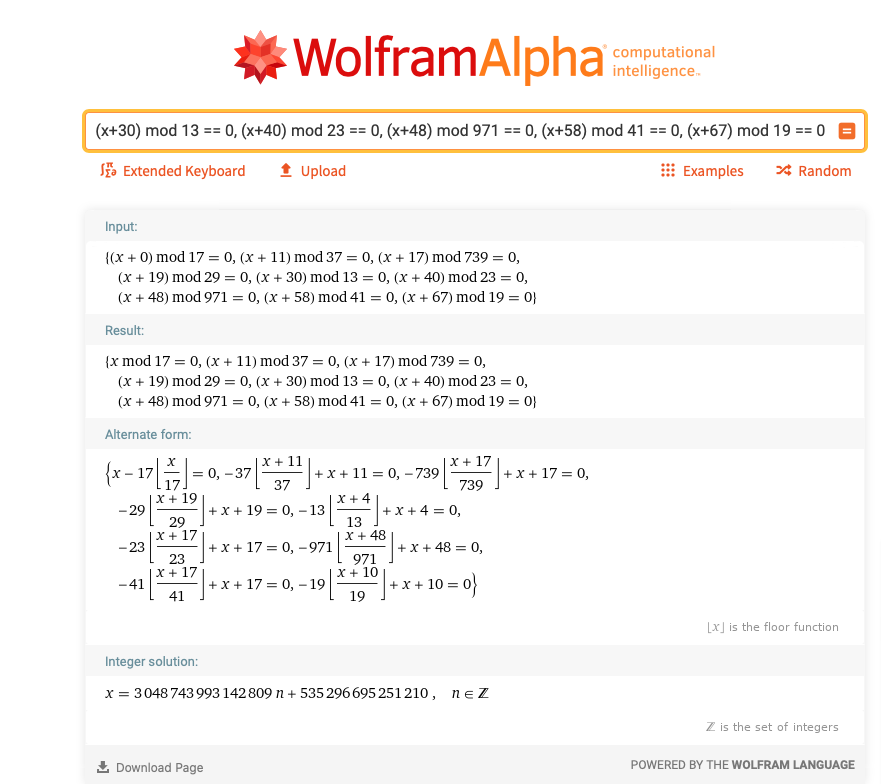